In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv('model_df.csv')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,...,distance_from_nearest_hotspot,year_last_renovated,time_since_renovated,total_rooms,condition_grade,sqft_total,price_o,rooms_cg,condition_grade_sq,time_since_renovated_sq
0,12.309982,3,1.00,7.073270,5650,1.0,0,3,7,1180,...,2.662882,1955.0,60.0,4.00,10,7.073270,221900.0,14.00,100,3600.0
1,13.195614,3,2.25,7.851661,7242,2.0,0,3,7,2170,...,2.288785,1991.0,24.0,5.25,10,8.851661,538000.0,15.25,100,576.0
2,12.100712,2,1.00,6.646391,10000,1.0,0,3,6,770,...,2.311032,1933.0,82.0,3.00,9,6.646391,180000.0,12.00,81,6724.0
3,13.311329,4,3.00,7.580700,5000,1.0,0,5,7,1050,...,2.291486,1965.0,50.0,7.00,12,8.580700,604000.0,19.00,144,2500.0
4,13.142166,3,2.00,7.426549,8080,1.0,0,3,8,1680,...,1.540106,1987.0,28.0,5.00,11,7.426549,510000.0,16.00,121,784.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19682 entries, 0 to 19681
Data columns (total 27 columns):
price                            19682 non-null float64
bedrooms                         19682 non-null int64
bathrooms                        19682 non-null float64
sqft_living                      19682 non-null float64
sqft_lot                         19682 non-null int64
floors                           19682 non-null float64
view                             19682 non-null int64
condition                        19682 non-null int64
grade                            19682 non-null int64
sqft_above                       19682 non-null int64
yr_built                         19682 non-null int64
yr_renovated                     19682 non-null int64
zipcode                          19682 non-null int64
basement                         19682 non-null int64
Renovated                        19682 non-null int64
age_when_sold                    19682 non-null int64
distance_from_seatt

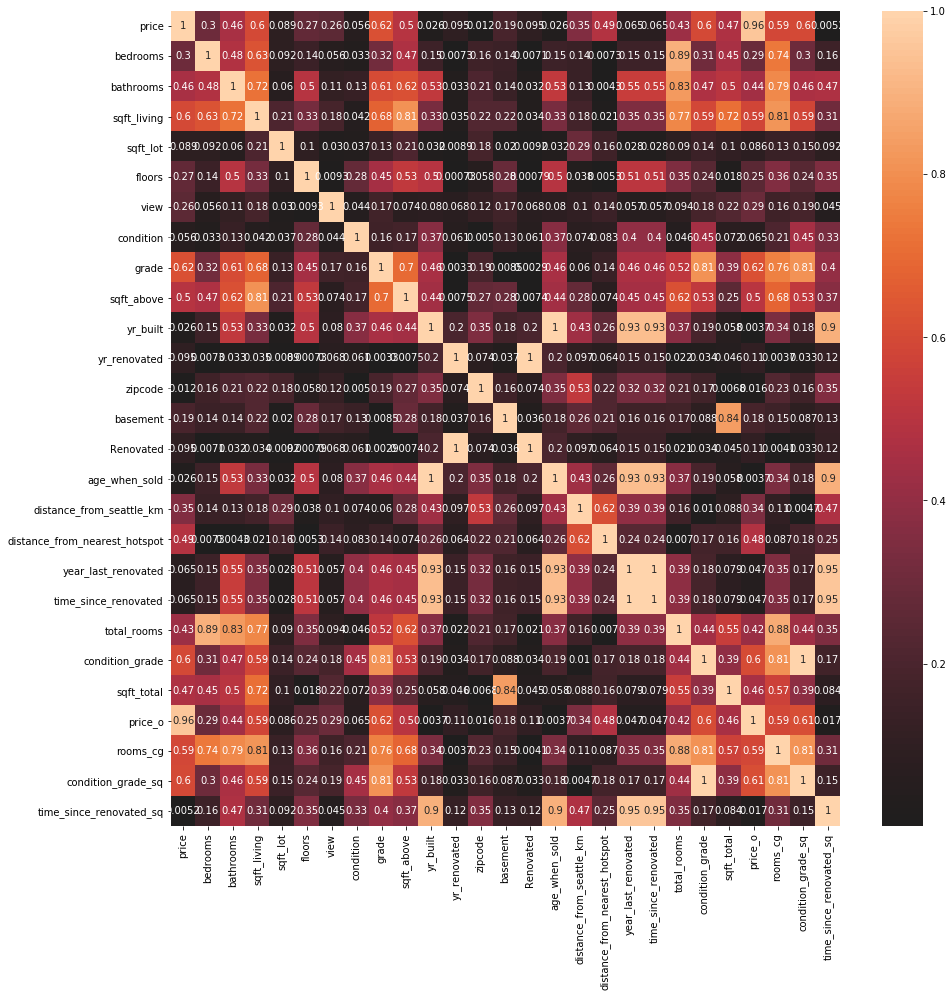

In [65]:
plt.figure(figsize=(15, 15))
sns.heatmap(np.abs(df.corr()), center=0, annot =True);
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [59]:
def make_ols_sm(df, cols, add_constant=False, target='price_o'):
    x = df[cols]
    if add_constant:
        x = sm.add_constant(x)
    ols = sm.OLS(df[target], x)
    res = ols.fit()
    print(res.summary())
    return res

In [60]:
cols = ['time_since_renovated', 'condition_grade_sq', 'Renovated', 'basement', 'view']

res = make_ols_sm(df, cols)

                                 OLS Regression Results                                
Dep. Variable:                price_o   R-squared (uncentered):                   0.890
Model:                            OLS   Adj. R-squared (uncentered):              0.890
Method:                 Least Squares   F-statistic:                          3.177e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        13:50:37   Log-Likelihood:                     -2.6622e+05
No. Observations:               19682   AIC:                                  5.325e+05
Df Residuals:                   19677   BIC:                                  5.325e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [61]:
X = df[cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(cols, vif))

[('time_since_renovated', 2.8410498876413723),
 ('condition_grade_sq', 3.1143028769918084),
 ('Renovated', 1.0503986065798132),
 ('basement', 1.7405733555157936),
 ('view', 1.119063010611647)]

In [56]:
def plot_residuals(df, res, target='price_o'):
    plt.hist(res.resid)
    plt.show()
    
    plt.scatter(df[target], res.resid)
    plt.hlines(y=0, xmin=0, xmax=df[target].max())
    plt.xlabel(target)
    plt.ylabel('Residuals')
    plt.show()

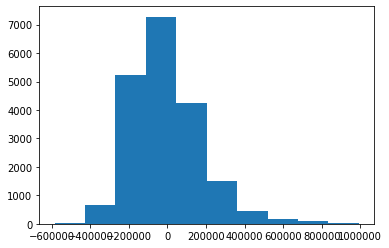

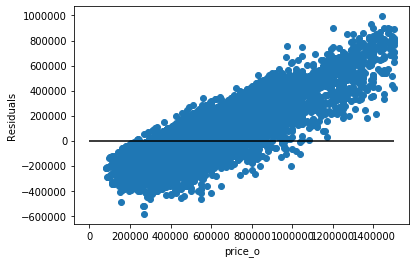

In [62]:
plot_residuals(df, res)

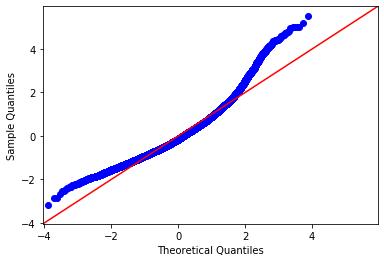

In [63]:
fig = sm.graphics.qqplot(res.resid, dist=stats.norm, line='45', fit=True)